In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

In [3]:
df_tr = pd.read_excel("train.xlsx").drop(columns="Unnamed: 0")
df_test = pd.read_excel("test.xlsx").drop(columns="Unnamed: 0")

In [4]:
# Выведем часть наших датафреймов для ознокамления
df_tr.head()

,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [5]:
df_test.head()

,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",NaN,...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",NaN,...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",NaN,...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",NaN,...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",NaN,...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


# Обработаем пропуски, построим графики и причешим данные




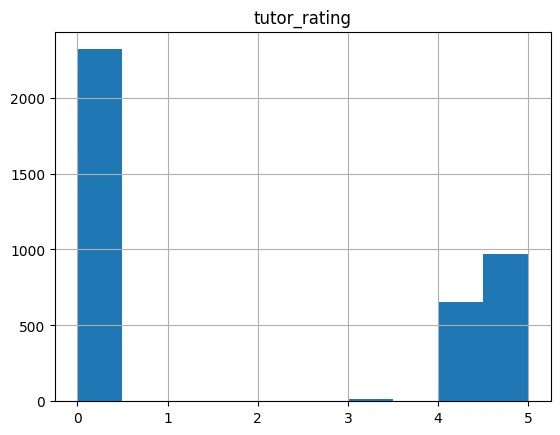

In [6]:
# Проанализируем гистаграму распределения и заполним медианными значениями колонку tutor_rating
df_tr.hist("tutor_rating")
df_tr.tutor_rating = df_tr.tutor_rating.fillna(df_tr.tutor_rating.median())
df_test.tutor_rating = df_test.tutor_rating.fillna(df_test.tutor_rating.median())

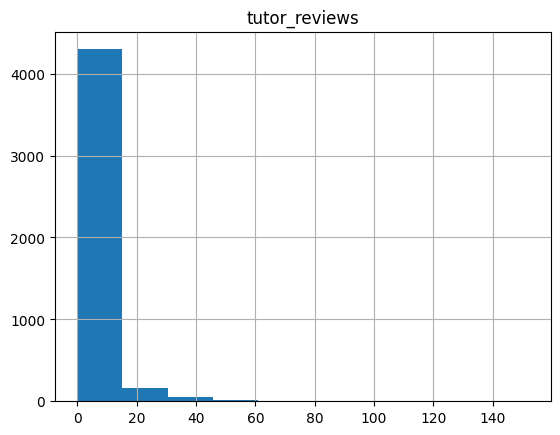

In [7]:
# Проанализируем гистаграму распределения и заполним медианными значениями колонку tutor_reviews
df_tr.hist("tutor_reviews")
df_tr.tutor_reviews = df_tr.tutor_reviews.fillna(df_tr.tutor_reviews.median())
df_test.tutor_reviews = df_test.tutor_reviews.fillna(df_test.tutor_reviews.median())

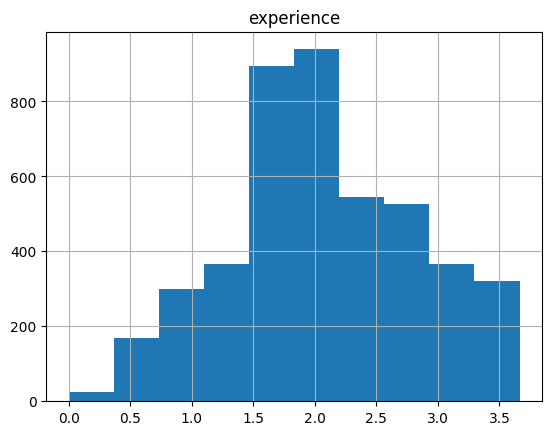

In [8]:
df_tr.experience = df_tr.experience.fillna('0')
df_tr.experience = df_tr.experience.apply(lambda row: np.log1p(int(row.split()[0]))) # преобразуем experience в int для удобства и прологарифмируем, чтобы нормализовать распределние
# Уберем выбросы, оставив .975 перцентиль в данных
df_tr = df_tr[df_tr.experience <= df_tr.experience.quantile(0.975)]
df_tr.hist('experience')

# не забываем про тест
df_test.experience = df_test.experience.fillna('0')
df_test.experience = df_test.experience.apply(lambda row: np.log1p(int(row.split()[0])))

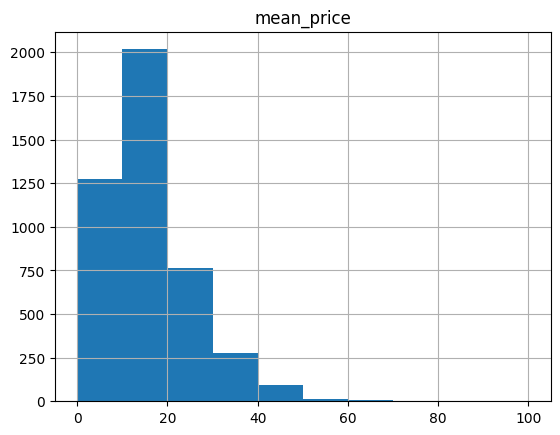

In [9]:
# Разберемся с таргетом
df_tr.hist("mean_price") # видим, что на графике есть выбросы, удалим слишком маленькие и слишком большие значения
df_tr = df_tr.loc[(df_tr['mean_price'] <= df_tr.mean_price.quantile(0.975)) & (df_tr['mean_price'] >= df_tr.mean_price.quantile(0.025))]
# из соображений логики, возможно данных нет тк оценок  нет и можно заполнить 0, но пока так

array([[<Axes: title={'center': 'mean_price'}>]], dtype=object)

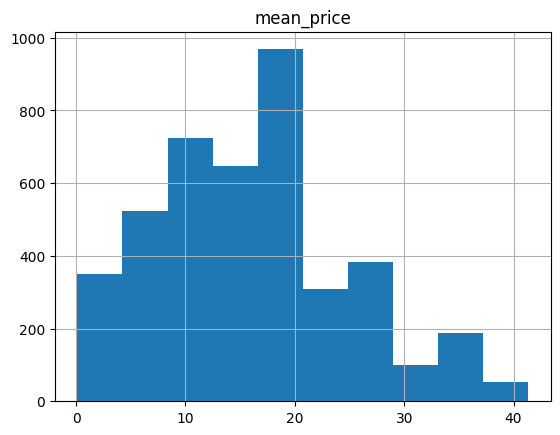

In [10]:
df_tr.hist("mean_price")

In [11]:
# Объединим текстовые колнки  посчитать по ним bag of words
text_cols = ['description', 'Education_1', 'Desc_Education_1', 'Education_2', 'Desc_Education_2', 'status', 'experience_desc']
df_tr[text_cols] = df_tr[text_cols].fillna('не заполнено')
df_test[text_cols] = df_test[text_cols].fillna('не заполнено')
for tc in text_cols:
    df_tr['description'] += ' ' + df_tr[tc]
    df_test['description'] += ' ' + df_test[tc]

In [12]:
# удалим шумные стобцы, то есть те, в которых заполнено меньше 10%
excess_columns = df_tr.loc[:, df_tr.isna().mean() > 0.9].columns
df_tr.drop(columns=excess_columns, inplace=True)
df_test.drop(columns=excess_columns, inplace=True)

In [13]:
df_tr.isna().sum()

предмет             0
ФИО                 0
tutor_head_tags     0
tutor_rating        0
tutor_reviews       0
description         0
experience_desc     0
Education_1         0
Desc_Education_1    0
Education_2         0
Desc_Education_2    0
status              0
experience          0
categories          0
mean_price          0
dtype: int64

In [14]:
# Данные чисты, можем приступать к следующему этапу - обработаем текст с помощью Bag of Words и метода главных компонент

In [15]:
bow = CountVectorizer()
pca = PCA(n_components=32)
vectors = bow.fit_transform(df_tr['description'])
pca_embs = pca.fit_transform(vectors.toarray())
df_tr[[f'pca_{i}' for i in range(pca_embs.shape[1])]] = pca_embs

vectors = bow.transform(df_test['description'])
pca_embs = pca.transform(vectors.toarray())
df_test[[f'pca_{i}' for i in range(pca_embs.shape[1])]] = pca_embs

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df_tr.select_dtypes(include=numerics).columns
cat_features = df_tr.select_dtypes(include='object').columns

# Проверка статистических гипотез

In [17]:
# Гиптотеза 1:
# Нулевая гипотеза: mean_price распределен нормально, конкурирущая гипотеза - mean_price распределен нормально, alpha=0.01

In [18]:
shapiro(df_tr['mean_price'])

ShapiroResult(statistic=0.968644917011261, pvalue=1.7664256300993002e-29)

In [19]:
# p_value < alpha, поэтому нулевая гипотеза неверна

In [20]:
# Гиптотеза 2:
# Существует линейная зависимость между mean_price и experience

In [21]:
df_tr['mean_price'].corr(df_tr['experience'])

0.15069302915826366

In [22]:
# Видим, что корреляция есть, но довольно низкая, поэтому гипотеза неверна

In [23]:
# Гиптотеза 3:
# Существует линейная зависимость между mean_price и tutor_rating

In [24]:
df_tr['mean_price'].corr(df_tr['tutor_rating'])

0.13494155737037622

In [25]:
# Видим, что корреляция есть, но довольно низкая, поэтому гипотеза неверна

In [26]:
# Гиптотеза 4:
# Нулевая гипотеза: pca_3 распределен нормально, конкурирущая гипотеза - pca_3 распределен нормально, alpha=0.01

In [27]:
shapiro(df_tr['pca_3'])

ShapiroResult(statistic=0.8786658048629761, pvalue=0.0)

In [28]:
# p_value < alpha, поэтому нулевая гипотеза неверна

array([[<Axes: title={'center': 'pca_3'}>]], dtype=object)

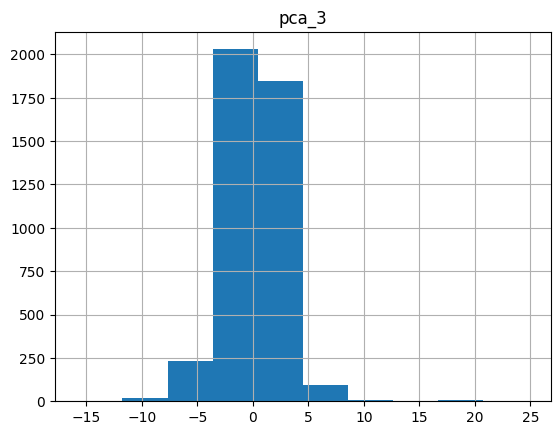

In [29]:
df_tr.hist(['pca_3'])

In [30]:
# сохраним df_tr и df_test для тренировке моделей

df_tr.to_csv("final_train.csv", index=None)
df_test.to_csv("final_test.csv", index=None)